In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("US_Accidents_March23.csv")
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-6,Source2,3,2/8/2016 7:44,2/8/2016 8:14,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-10,Source2,3,2/8/2016 8:10,2/8/2016 8:40,40.100590,-82.925194,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-12,Source2,3,2/8/2016 8:21,2/8/2016 8:51,39.932709,-82.830910,0.01,One lane blocked due to accident on I-70 Westb...,I-70 E,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.shape

(522362, 44)

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Accidents Due to Road Conditions

In [5]:
road_condition_columns = ['Bump', 'Crossing', 'Give_Way', 'Junction', 
                          'No_Exit', 'Railway', 'Roundabout', 'Stop', 
                          'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

df_road_condition = df[road_condition_columns]
df_road_condition.head(4)


,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False


In [6]:
true_counts = df_road_condition.apply(lambda col: col.value_counts().get(True, 0))
true_counts


Bump                  189
Crossing            63318
Give_Way             3170
Junction            25708
No_Exit              1385
Railway              4633
Roundabout             13
Stop                14198
Traffic_Calming       474
Traffic_Signal     100202
Turning_Loop            0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

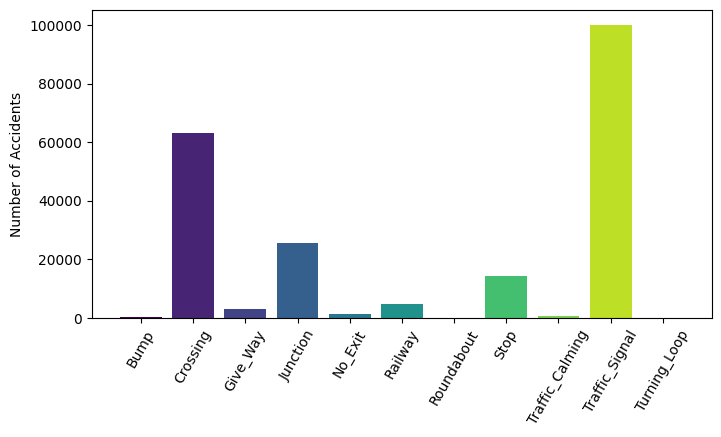

In [7]:
plt.figure(figsize=(8,4))
colors = plt.cm.viridis(np.linspace(0, 1, len(true_counts)))
plt.bar(road_condition_columns,true_counts, color=colors)
plt.xticks(rotation=60)
plt.ylabel("Number of Accidents")
plt.show

In [8]:
False_counts=df_road_condition.apply(lambda cal: cal.value_counts().get(False,0) )
False_counts

Bump               522173
Crossing           459044
Give_Way           519192
Junction           496654
No_Exit            520977
Railway            517729
Roundabout         522349
Stop               508164
Traffic_Calming    521888
Traffic_Signal     422160
Turning_Loop       522362
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

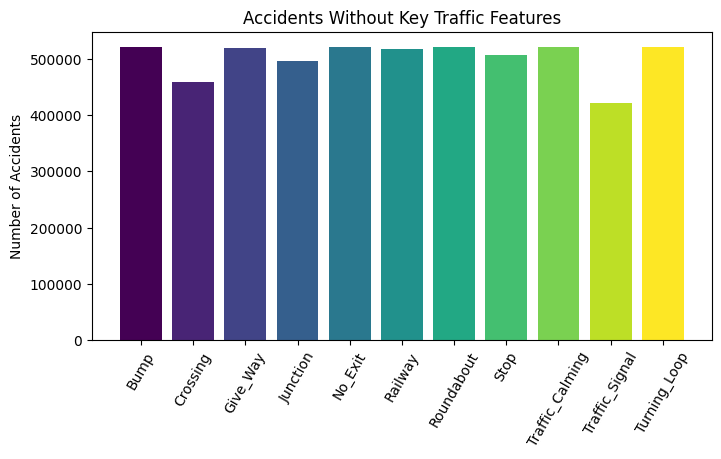

In [9]:
plt.figure(figsize=(8,4))
colors = plt.cm.viridis(np.linspace(0, 1, len(False_counts)))
plt.bar(road_condition_columns,False_counts, color=colors)
plt.xticks(rotation=60)
plt.title("Accidents Without Key Traffic Features")
plt.ylabel("Number of Accidents")
plt.show

In [52]:
F_mean=False_counts.mean()
F_percentage=(F_mean/522362)*100

# F_percentage refers to accidents that occurred in locations where certain important traffic features,
# like bumps, crossings, stop signs, traffic signals, and other similar elements, were absent
print("Percentage of Accidents Without Road Condition Faults = ",F_percentage,"%")
print(" Accidents due to  Road Conditions: ",100-F_percentage,"%")   

Percentage of Accidents Without Road Condition Faults =  96.28801482496813 %
 Accidents due to  Road Conditions:  3.71198517503187 %


# Accidents rate due to Weather

In [11]:
# ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
#        'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
#        'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
#        'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
#        'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
#        'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
#        'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
#        'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
#        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
#        'Astronomical_Twilight']

In [12]:
weather_condition_columns=[  'Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition']

df_weather_condition=df[weather_condition_columns]
df_weather_condition


,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,3,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain
1,3,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain
2,3,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain
3,2,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain
4,2,33.8,29.6,100.0,29.62,2.0,NNW,4.6,0.01,Light Snow
...,...,...,...,...,...,...,...,...,...,...
522357,2,55.0,55.0,72.0,29.49,10.0,ENE,8.0,0.00,Fair
522358,2,59.0,59.0,67.0,29.72,10.0,NE,5.0,0.00,Fair
522359,3,61.0,61.0,55.0,29.51,10.0,ENE,9.0,0.00,Fair
522360,3,58.0,58.0,68.0,29.58,10.0,NE,7.0,0.00,Fair


In [16]:
# df_weather_condition['Weather_Condition'].unique()

In [44]:
#I need to filter the data to show where accidents occur.

high_risk_weather_conditions = ['Heavy Rain', 'Snow', 'Fog', 'Thunderstorm', 'Heavy Snow',
                         'Sleet', 'Ice Pellets', 'Blowing Dust / Windy', 'Light Freezing Rain', 
                         'Heavy Thunderstorms and Rain', 'Rain / Windy']

# The following have conditions that are associated with a high risk of accidents
Weather_Condition_filter=  ( df_weather_condition['Weather_Condition'].isin(high_risk_weather_conditions)).sum()
Temperature_filter = ((df_weather_condition['Temperature(F)'] <= 32) | (df_weather_condition['Temperature(F)'] >= 95)).sum()


Wind_Chill_filter = (df_weather_condition['Wind_Chill(F)'] <= 0).sum()

Humidity_filter = (df_weather_condition['Humidity(%)'] >= 80).sum()

Pressure_filter_low = (df_weather_condition['Pressure(in)'] <= 29.5).sum()
Pressure_filter_high = (df_weather_condition['Pressure(in)'] >= 30.5).sum()

Visibility_filter = (df_weather_condition['Visibility(mi)'] <= 1).sum()

Wind_Speed_filter = (df_weather_condition['Wind_Speed(mph)'] >= 30).sum()

Precipitation_filter = (df_weather_condition['Precipitation(in)'] >= 0.3).sum()

print(Weather_Condition_filter,Temperature_filter,Wind_Chill_filter,Humidity_filter,Pressure_filter_low,Pressure_filter_high, Visibility_filter,Wind_Speed_filter,Precipitation_filter )


13075 40474 2142 195429 236644 883 15057 528 2325


40474

<function matplotlib.pyplot.show(close=None, block=None)>

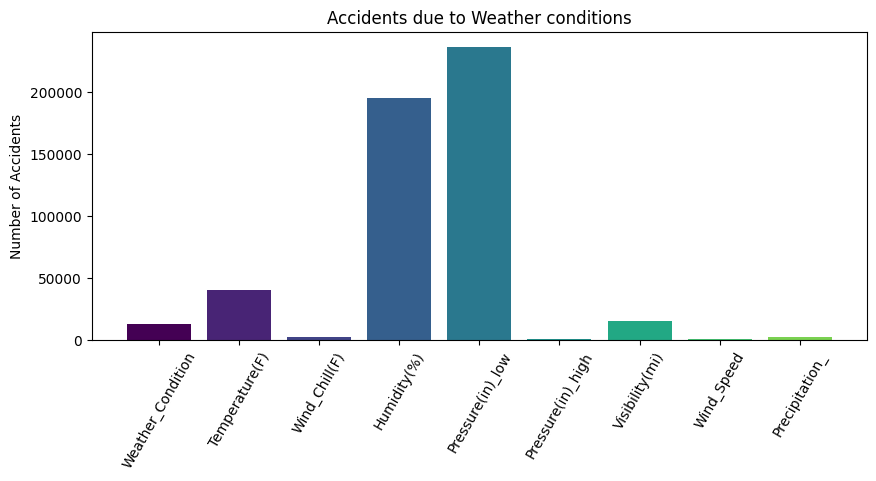

In [54]:
counts_w=[13075, 40474, 2142 ,195429 ,236644 ,883 ,15057, 528 ,2325]
classes_w=['Weather_Condition','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)_low','Pressure(in)_high', 'Visibility(mi)','Wind_Speed','Precipitation_']

plt.figure(figsize=(10,4))
plt.title("Accidents due to Weather conditions")
plt.bar(classes_w,counts_w, color=colors)
plt.xticks(rotation=60)
plt.ylabel("Number of Accidents")
plt.show

In [62]:
mean_w=np.array(counts_w).mean()
accidents_percent_due_to_weather= (mean_w/522362)*100
accidents_percent_due_to_weather

10.774924498931988

# Accident rates based on the time of day

In [69]:
time_related_col=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']
df_time=df[time_related_col]
df_time['Astronomical_Twilight'].unique()

array(['Day', 'Night'], dtype=object)

In [74]:
Night_counts=df_time.apply(lambda cal: cal.value_counts().get('Night',0) )
Night_counts

dtype('int64')

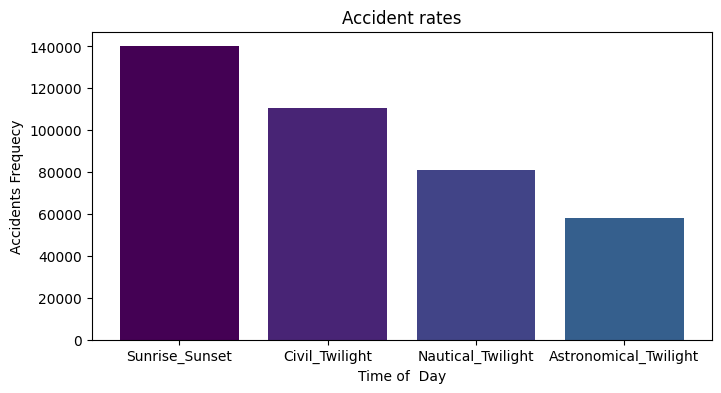

In [79]:
plt.figure(figsize=(8,4))
plt.bar(time_related_col,Night_counts, color=colors)
plt.title("Accident rates")
plt.ylabel("Accidents Frequecy")
plt.xlabel("Time of  Day")
plt.show()

In [82]:
mean_t= Night_counts.mean()


In [87]:
Time_percentage=(mean_t/522362)*100
print("Accident percentage based on the time of day ",Time_percentage,"%")


Accident percentage based on the time of day  18.63262450178229 %
